# 有外场，PBC条件，2D Ising model

In [27]:
import torch,math
import numpy as np
from scipy.linalg import sqrtm
L=3
J=1
h=1
beta=1

#the Boltzmann matrix
B=torch.tensor(sqrtm(np.array([[np.exp(-beta*(-J-h/2)),np.exp(-beta*J)],[np.exp(-beta*J),np.exp(beta*(-J+h/2))]])))

A4=torch.einsum("i,j,k,l->ijkl",B[:,0],B[:,0],B[:,0],B[:,0]) + torch.einsum("i,j,k,l->ijkl",B[:,1],B[:,1],B[:,1],B[:,1])
    
tensors=[]
for j in range(L):
    tensors.append( [ A4 for i in range(L) ] )
    
display(tensors)

[[tensor([[[[19.9400,  1.2063],
            [ 1.2063,  0.0824]],
  
           [[ 1.2063,  0.0824],
            [ 0.0824,  0.0623]]],
  
  
          [[[ 1.2063,  0.0824],
            [ 0.0824,  0.0623]],
  
           [[ 0.0824,  0.0623],
            [ 0.0623,  0.3486]]]], dtype=torch.float64),
  tensor([[[[19.9400,  1.2063],
            [ 1.2063,  0.0824]],
  
           [[ 1.2063,  0.0824],
            [ 0.0824,  0.0623]]],
  
  
          [[[ 1.2063,  0.0824],
            [ 0.0824,  0.0623]],
  
           [[ 0.0824,  0.0623],
            [ 0.0623,  0.3486]]]], dtype=torch.float64),
  tensor([[[[19.9400,  1.2063],
            [ 1.2063,  0.0824]],
  
           [[ 1.2063,  0.0824],
            [ 0.0824,  0.0623]]],
  
  
          [[[ 1.2063,  0.0824],
            [ 0.0824,  0.0623]],
  
           [[ 0.0824,  0.0623],
            [ 0.0623,  0.3486]]]], dtype=torch.float64)],
 [tensor([[[[19.9400,  1.2063],
            [ 1.2063,  0.0824]],
  
           [[ 1.2063,  0.0824],
        

In [24]:
import torch,math
import numpy as np
from scipy.linalg import sqrtm

J=1
h=0
beta=1

#the Boltzmann matrix
B=torch.tensor(sqrtm(np.array([[np.exp(-beta*(-J-h/2)),np.exp(-beta*J)],[np.exp(-beta*J),np.exp(-beta*(-J+h/2))]])))

A4=torch.einsum("i,j,k,l->ijkl",B[:,0],B[:,0],B[:,0],B[:,0]) + torch.einsum("i,j,k,l->ijkl",B[:,1],B[:,1],B[:,1],B[:,1])

AA4=torch.einsum("ijkl,kabc->ijablc",A4,A4).contiguous().view(2,4,2,4)

AAA4=torch.einsum("ijkl,abcj->iabkcl",AA4,AA4).contiguous().view(4,4,4,4)

print(torch.trace(AAA4.view(16,16)))

--------------------------------------------------------
tensor(5973.9166, dtype=torch.float64)


# $\sqrt{B}$

In [23]:
import torch,math
import numpy as np
from scipy.linalg import sqrtm

J=1
h=0
beta=1

#the Boltzmann matrix
B=torch.tensor(sqrtm(np.array([[np.exp(-beta*(-J-h/2)),np.exp(-beta*J)],[np.exp(-beta*J),np.exp(-beta*(-J+h/2))]])))

A4=torch.einsum("i,j,k,l->ijkl",B[:,0],B[:,0],B[:,0],B[:,0]) + torch.einsum("i,j,k,l->ijkl",B[:,1],B[:,1],B[:,1],B[:,1])

AA4=torch.einsum("ijkl,kabc->ijablc",A4,A4)#.contiguous().view(2,4,2,4)

AAA4=torch.einsum("ijklmn,abcdjk->iabcldmn",AA4,AA4)#.contiguous().view(4,4,4,4)

#              k m
#       i      ||     i
#       ==== AAA4 ====
#      j      ||     j
#            k m

trace=0
for i in range(2):
    for j in range(2):
        for k in range(2):
            for m in range(2):
                trace = trace + AAA4[i,j,k,m,i,j,k,m]
print(trace)

tensor(5973.9166, dtype=torch.float64)


# W

In [55]:
import torch,math
import numpy as np
from scipy.linalg import sqrtm

beta=1

W=torch.tensor([[np.sqrt(np.cosh(beta)),np.sqrt(np.sinh(beta))],[np.sqrt(np.cosh(beta)),-np.sqrt(np.sinh(beta))]])
# display(W)

T=torch.einsum("ia,ib,ic,id->abcd",W,W,W,W)#.contiguous().view(2,2,2,2)
# display(T)
       
#      |    k  |
# i---- T ---  T----
#     | j     |
T2=torch.einsum("ijkl,kabc->ijablc",T,T)#.contiguous().view(2,4,2,4)
# display(T2.shape)

# T2
# |
# T2
# T22=torch.einsum("ijklnm,abcdkj->iabcldnm",T2,T2)#.contiguous().view(4,4,4,4)
T22=torch.einsum("ijklmn,abcdjk->iabcldmn",T2,T2)#.contiguous().view(4,4,4,4)
# display(T22.shape)

# T22=torch.einsum("abcd,cfgh,ihkl,mdip->abfgklmp",T,T,T,T)
#            k m
#       i    ||    i
#       ====T22====
#      j    ||    j
#          k m

trace=0
for i in range(2):
    for j in range(2):
        for k in range(2):
            for m in range(2):
                trace = trace + T22[i,j,k,m,i,j,k,m]
#                 trace = trace + T22[i,j,m,k,i,j,k,m]
print(trace)

tensor(5973.9166, dtype=torch.float64)


# T[0-2]

C:\Users\MHY\AppData\Local\Temp\ipykernel_1584\1384056890.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  f1 = - 1 / betalist[i] * (np.log(z1))/8


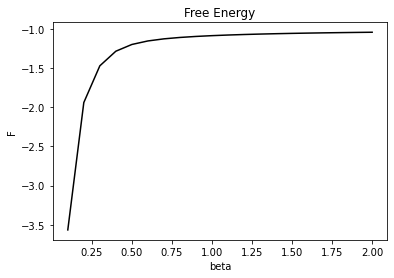

In [93]:
import torch,math
import numpy as np
from scipy.linalg import sqrtm
import matplotlib.pyplot as plt


def calcu_z(J,h,beta):
    #the Boltzmann matrix
    B=torch.tensor(sqrtm(np.array([[np.exp(-beta*(-J-h/2)),np.exp(-beta*J)],[np.exp(-beta*J),np.exp(-beta*(-J+h/2))]])))

    A4=torch.einsum("i,j,k,l->ijkl",B[:,0],B[:,0],B[:,0],B[:,0]) + torch.einsum("i,j,k,l->ijkl",B[:,1],B[:,1],B[:,1],B[:,1])

    AA4=torch.einsum("ijkl,kabc->ijablc",A4,A4)#.contiguous().view(2,4,2,4)

    AAA4=torch.einsum("ijklmn,abcdjk->iabcldmn",AA4,AA4)#.contiguous().view(4,4,4,4)
    #              k m
    #       i      ||     i
    #       ==== AAA4 ====
    #      j      ||     j
    #            k m
    trace=0
    for i in range(2):
        for j in range(2):
            for k in range(2):
                for m in range(2):
                    trace = trace + AAA4[i,j,k,m,i,j,k,m]
    return trace

J=1
h=0
betalist=np.linspace(0, 2, 21)

# main
z=[]
F=[]
for i in range(len(betalist)):
    z1=calcu_z(J,h,betalist[i])
    f1 = - 1 / betalist[i] * (np.log(z1))
    z.append(z1)
    F.append(f1)

    

plt.plot(betalist, F, c='k');
plt.title('Free Energy');
plt.xlabel('beta');
plt.ylabel('F');

In [73]:
np.log(z[1]-z[0])

tensor(0.2999, dtype=torch.float64)

In [4]:
import torch,math
import numpy as np
from scipy.linalg import sqrtm
L=3
J=1
h=1
beta=1

#the Boltzmann matrix
# B=torch.tensor(sqrtm(np.array([[np.exp(-beta*(-J-h/2)),np.exp(-beta*J)],[np.exp(-beta*J),np.exp(beta*(-J+h/2))]])))
B=torch.tensor(sqrtm(np.array([[np.exp(-1),np.exp(1)],[np.exp(1),np.exp(-1)]])))
print(B@B)

tensor([[0.3679+0.j, 2.7183+0.j],
        [2.7183+0.j, 0.3679+0.j]], dtype=torch.complex128)
